In [ ]:
!nvidia-smi

Thu Oct 31 13:10:03 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow==1.1.48 --quiet

# from roboflow import Roboflow
# rf = Roboflow(api_key="pSpZhFI3TmcRfsZEYe2M")
# project = rf.workspace("sankalpa-zn3xk").project("vs-project")
# version = project.version(2)
# dataset = version.download("yolov8")


from roboflow import Roboflow
rf = Roboflow(api_key="pSpZhFI3TmcRfsZEYe2M")
project = rf.workspace("sankalpa-zn3xk").project("visiosense-i2qij")
version = project.version(5)
dataset = version.download("yolov8")

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to VisioSense-5 in yolov8:: 100%|██████████| 3429/3429 [00:01<00:00, 2024.52it/s]


## Custom Training

In [ ]:
%cd {HOME}

#!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=200 imgsz=320 plots=True conf=0.7 iou=0.7 max_det=5

/content
100% 49.7M/49.7M [00:00<00:00, 336MB/s]
New https://pypi.org/project/ultralytics/8.3.26 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/VisioSense-5/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.7, iou=0.7, max_det=5, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, cla

/content


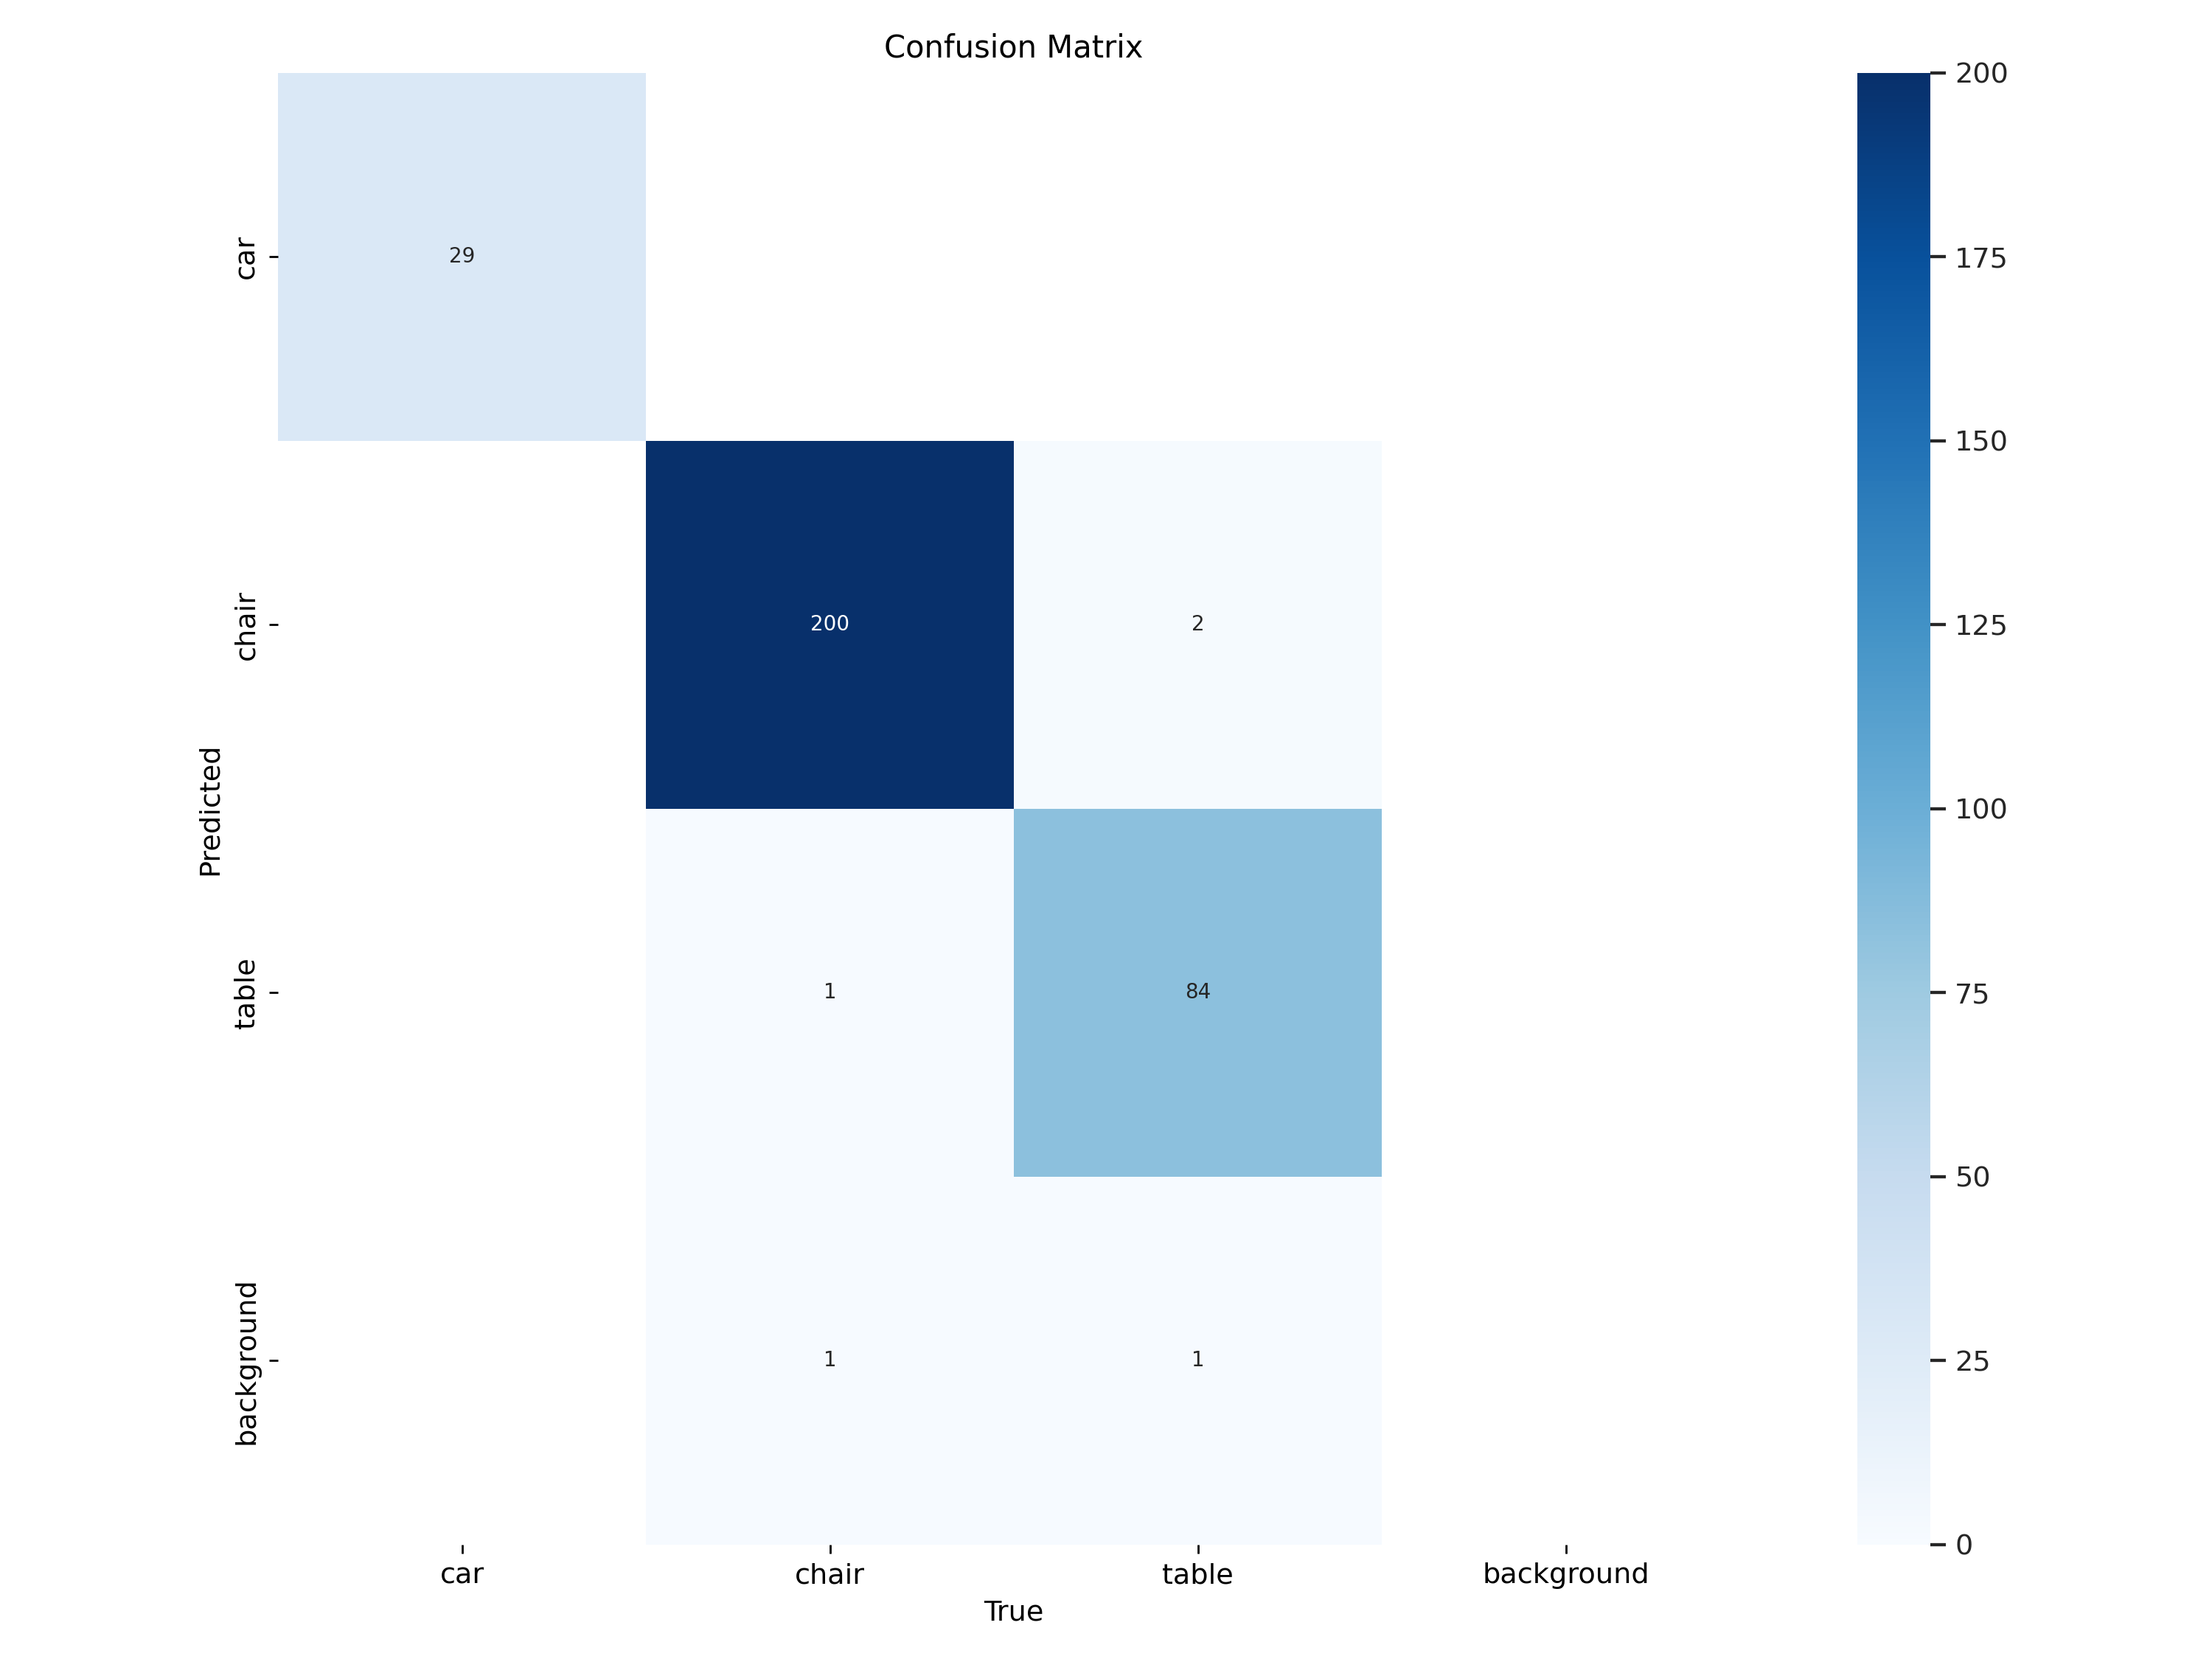

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


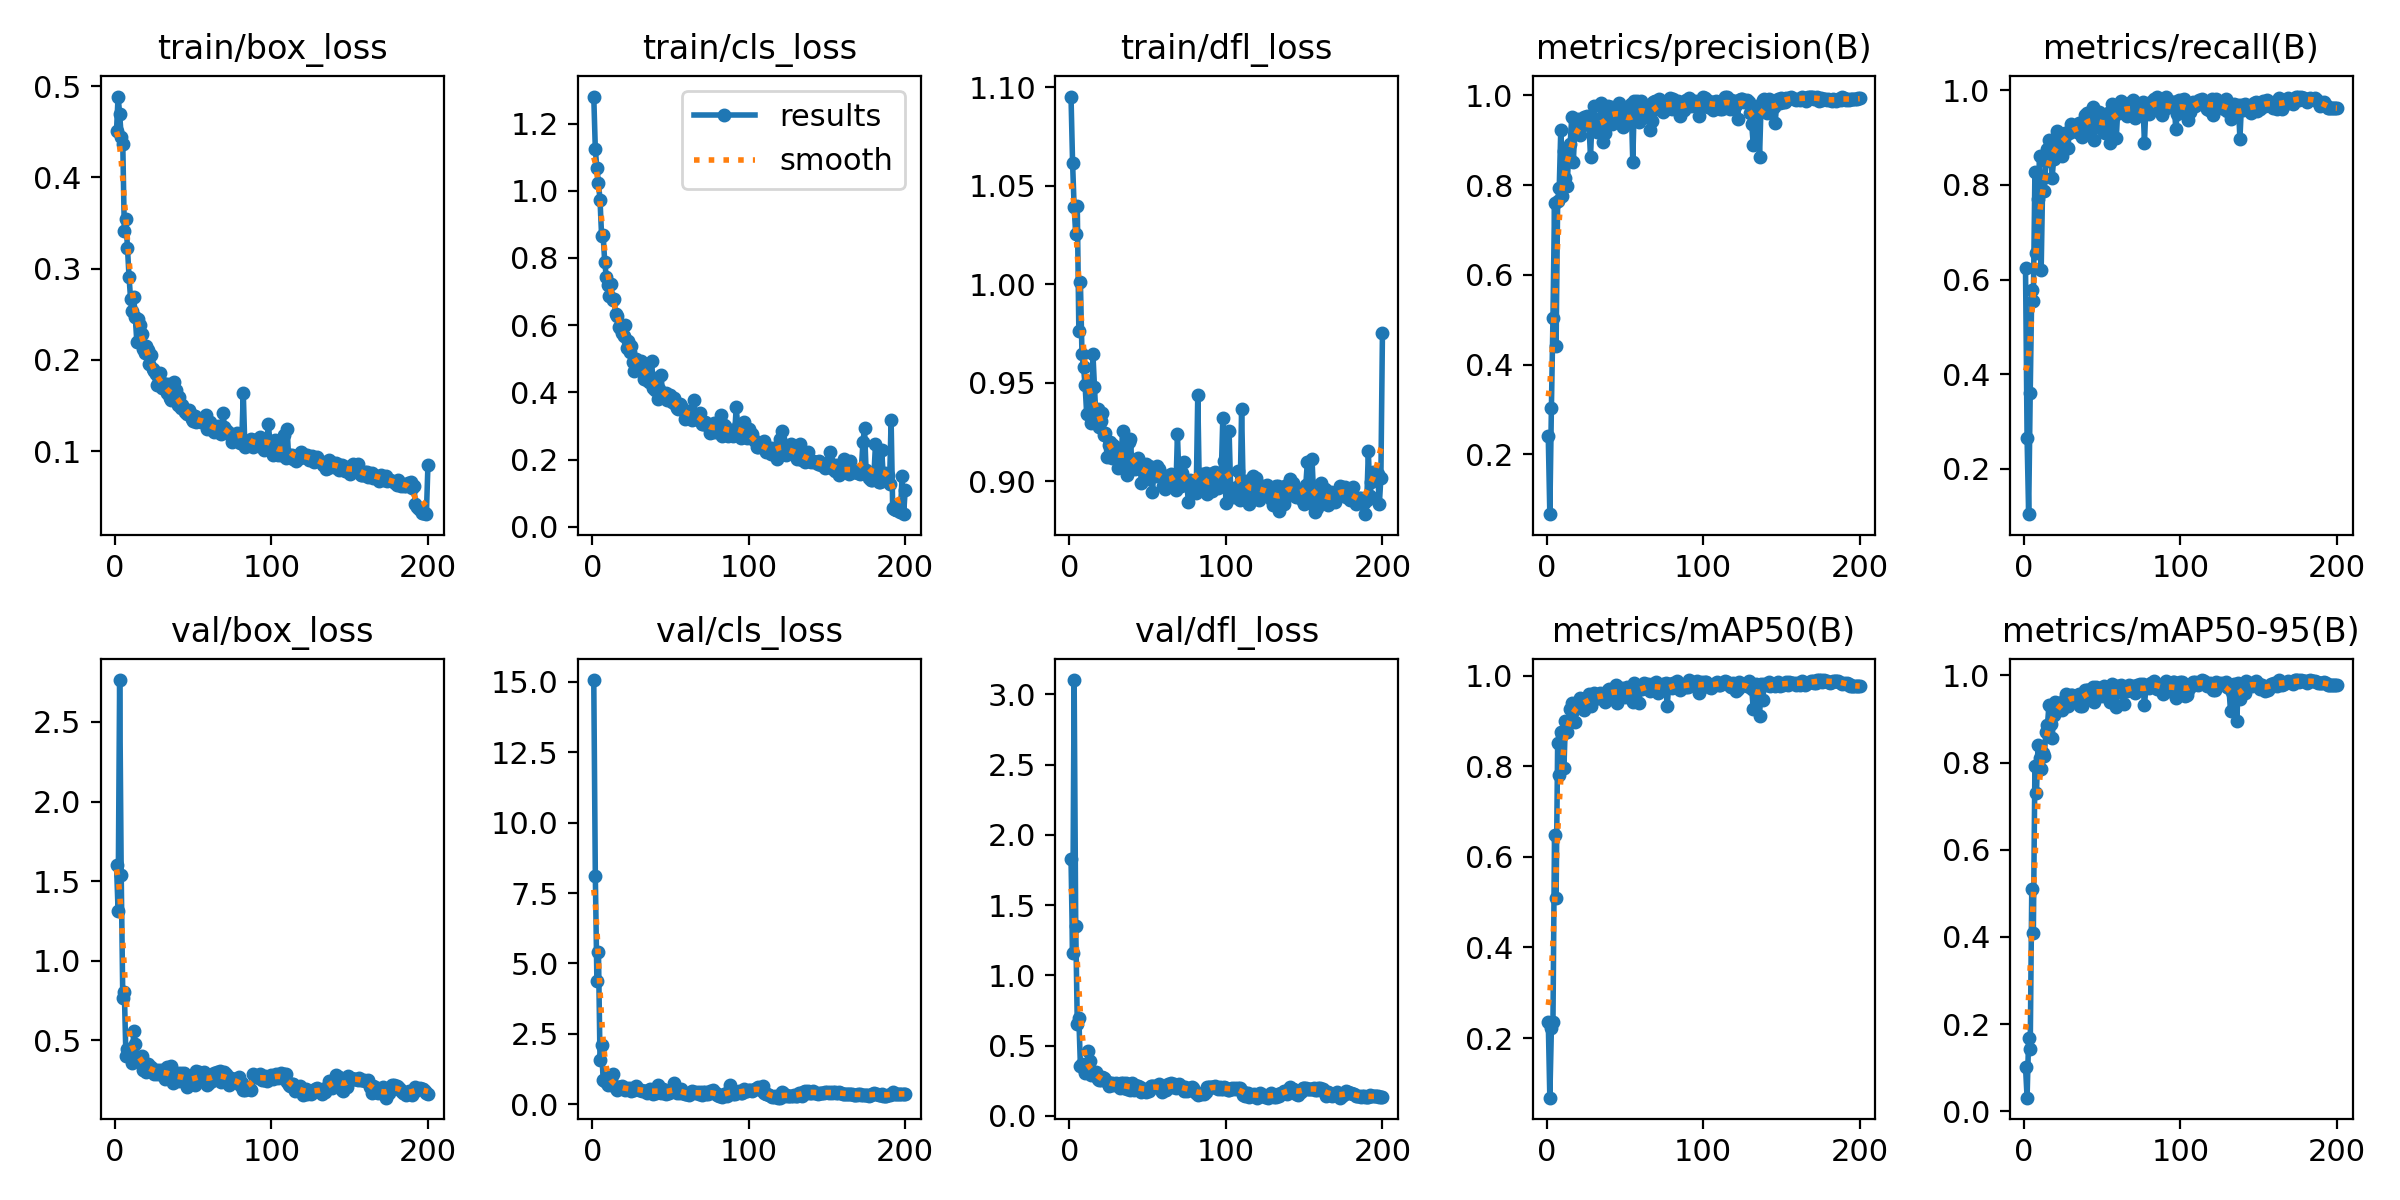

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


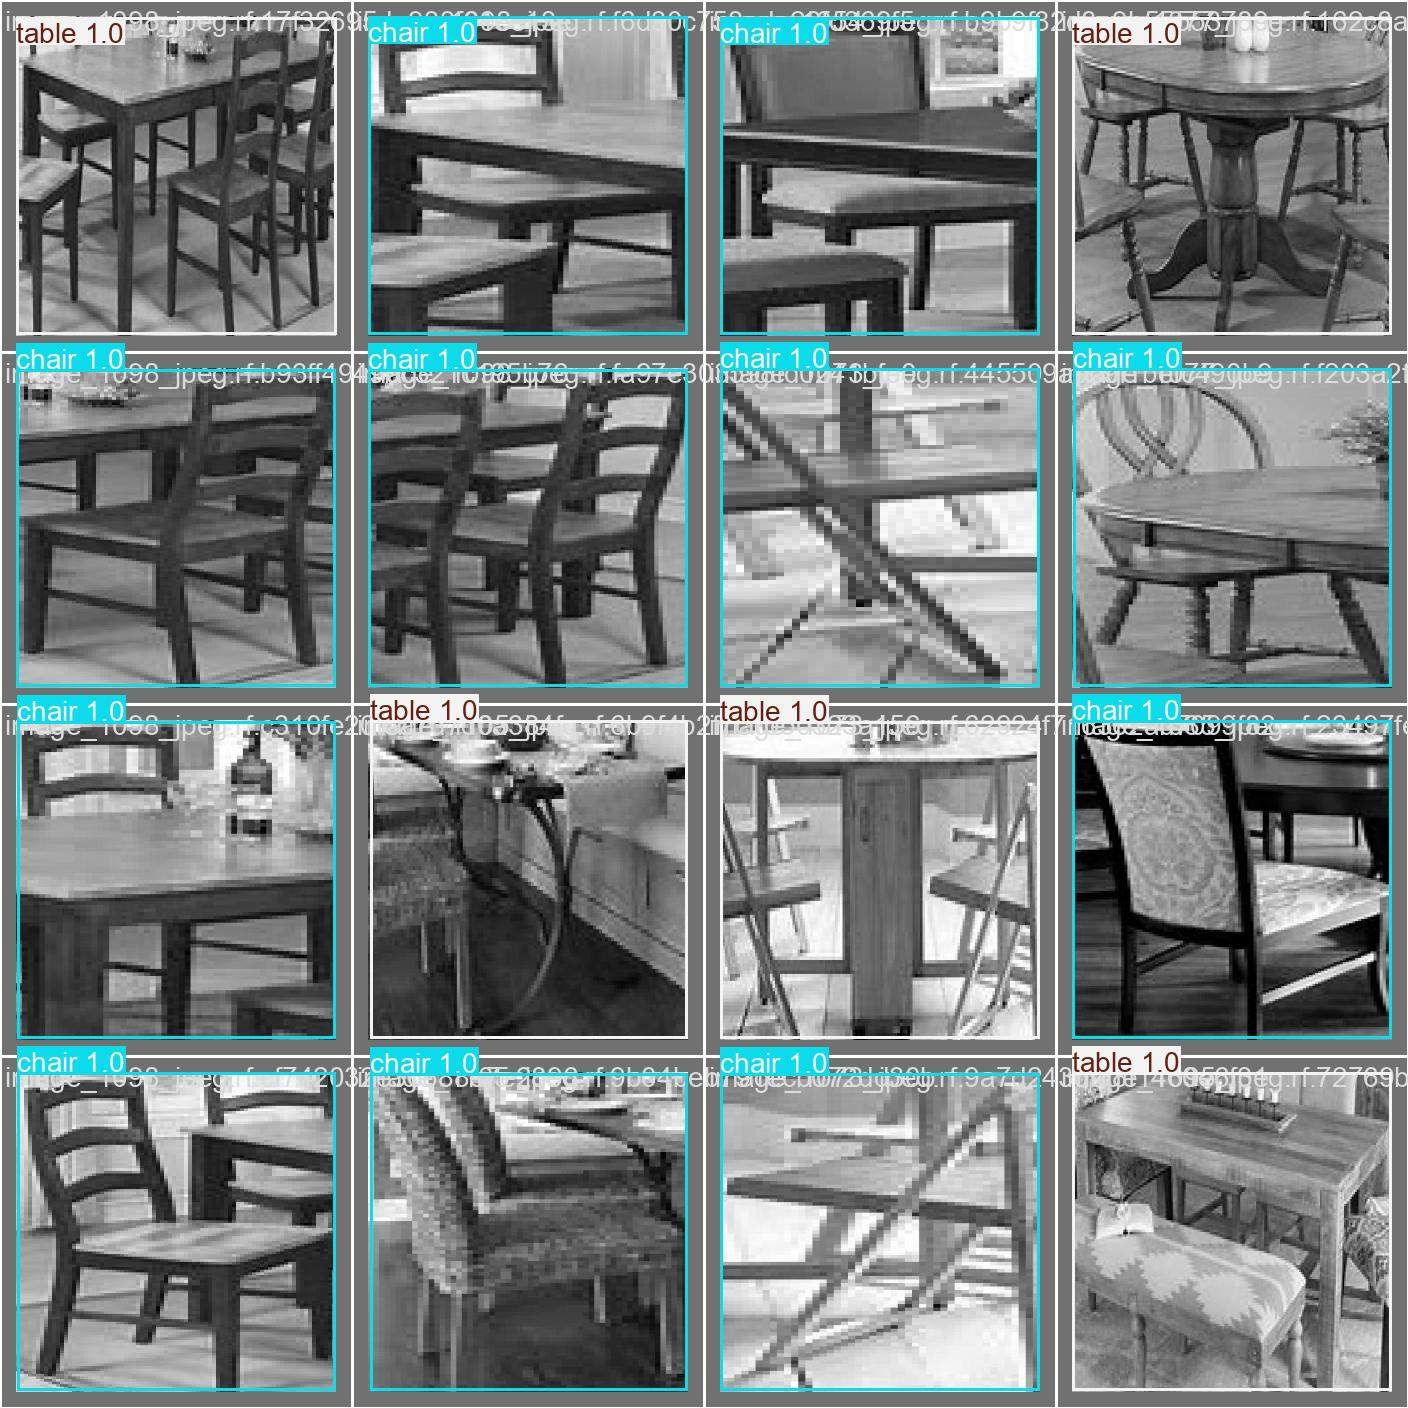

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/datasets/VisioSense-5/valid/labels.cache... 318 images, 0 backgrounds, 0 corrupt: 100% 318/318 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 20/20 [00:04<00:00,  4.72it/s]
                   all        318        318       0.99      0.986      0.989      0.986
                   car         29         29      0.992          1      0.995      0.986
                 chair        202        202       0.99      0.992      0.995      0.995
                 table         87         87      0.987      0.966      0.978      0.977
Speed: 0.1ms preprocess, 6.2ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.6 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs

image 1/174 /content/datasets/VisioSense-5/test/images/0307H5JTGKWE_jpg.rf.da27d608b1251aad85a5889b00278ee6.jpg: 320x320 1 chair, 15.9ms
image 2/174 /content/datasets/VisioSense-5/test/images/0WDWD7YDF3WY_jpg.rf.ddca15f94bafa8aec1b3f1dff442fa43.jpg: 320x320 1 chair, 15.9ms
image 3/174 /content/datasets/VisioSense-5/test/images/0ZA6E9VEPXO7_jpg.rf.79a0d36d5a8c59e336d022c75cf48949.jpg: 320x320 1 chair, 15.8ms
image 4/174 /content/datasets/VisioSense-5/test/images/109_jpg.rf.db9cf6c2b4c0b2850dae30c86ea6d3ee.jpg: 320x320 1 car, 15.8ms
image 5/174 /content/datasets/VisioSense-5/test/images/10_jpg.rf.1957921d61e7cfc0352e0c326920950f.jpg: 320x320 1 table, 15.8ms
image 6/174 /content/datasets/VisioSense-5/test/images/10_jpg.rf.8ec0e2e8f521b965c57b1eb16eae3b30.jpg: 320x320 1 car, 15.8ms
image 7/174 /content/datasets/

**NOTE:** Let's take a look at few results.

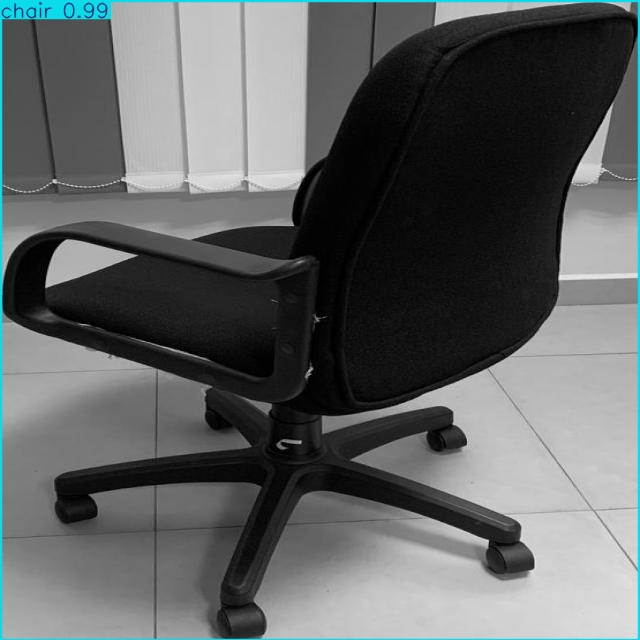

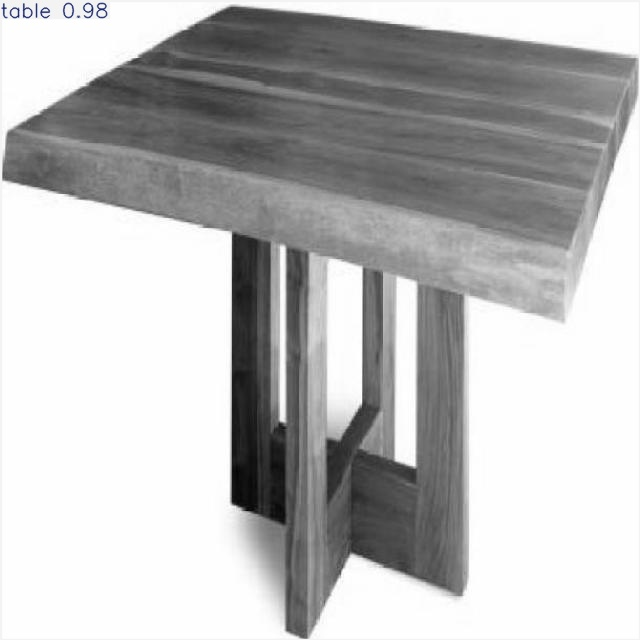

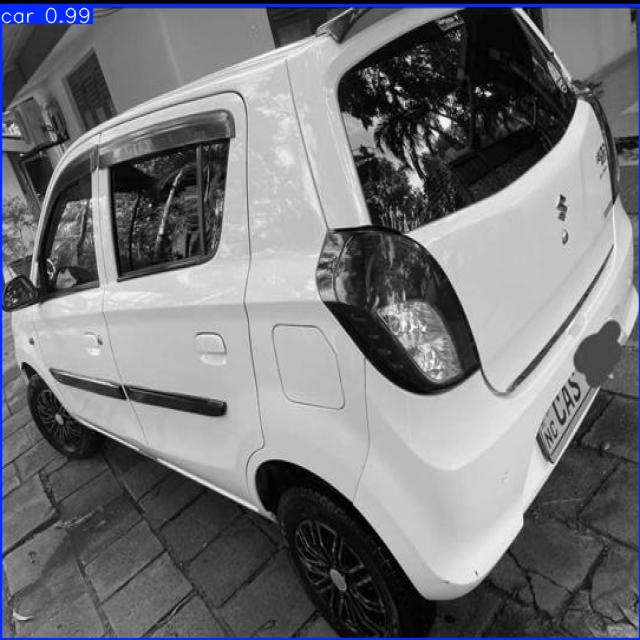

In [ ]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

Dependency ultralytics==8.0.196 is required but found version=8.2.103, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
View the status of your deployment at: https://app.roboflow.com/sankalpa-zn3xk/visiosense-i2qij/5


Follow the links above to check if the upload succeeded. It may take a couple of minutes until the model is visible to the `roboflow` SDK.

In [ ]:
# import time

# # Load model with retry mechanism
# model = None
# retries = 10  # Maximum number of retries
# retry_delay = 30  # Delay in seconds between retries

# for i in range(retries):
#     model = project.version(dataset.version).model
#     if model:
#         break
#     print(f"Model deployment is still loading... Retrying in {retry_delay} seconds (attempt {i+1}/{retries})")
#     time.sleep(retry_delay)

# assert model, "Model deployment failed after multiple retries"

# # Choose a random test image
# import os, random
# test_set_loc = dataset.location + "/test/images/"
# random_test_image = random.choice(os.listdir(test_set_loc))
# print("running inference on " + random_test_image)

# pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
# pred


import time

# Load model with retry mechanism
model = None
retries = 30  # Increased maximum number of retries to 30
retry_delay = 30  # Delay in seconds between retries

for i in range(retries):
    try:  # Added try-except block to handle potential errors during model loading
        model = project.version(dataset.version).model
        if model:
            break
        print(f"Model deployment is still loading... Retrying in {retry_delay} seconds (attempt {i+1}/{retries})")
    except Exception as e:
        print(f"Error during model loading: {e}")  # Print error message for debugging
        print(f"Retrying in {retry_delay} seconds (attempt {i+1}/{retries})")
    time.sleep(retry_delay)

assert model, "Model deployment failed after multiple retries"

# Choose a random test image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

Model deployment is still loading... Retrying in 30 seconds (attempt 1/30)
Model deployment is still loading... Retrying in 30 seconds (attempt 2/30)
Model deployment is still loading... Retrying in 30 seconds (attempt 3/30)
Model deployment is still loading... Retrying in 30 seconds (attempt 4/30)
Model deployment is still loading... Retrying in 30 seconds (attempt 5/30)
Model deployment is still loading... Retrying in 30 seconds (attempt 6/30)
Model deployment is still loading... Retrying in 30 seconds (attempt 7/30)
Model deployment is still loading... Retrying in 30 seconds (attempt 8/30)
running inference on U3HOOUA4UV4X_jpg.rf.46f4eb1e4f34ae6cf60ef6ff08f62c0c.jpg


{'predictions': [{'x': 320.0,
   'y': 320.5,
   'width': 640.0,
   'height': 639.0,
   'confidence': 0.986981213092804,
   'class': 'chair',
   'class_id': 1,
   'detection_id': 'f43946e5-1b0d-4cbf-9784-5734fcf0a671',
   'image_path': '/content/datasets/VisioSense-5/test/images/U3HOOUA4UV4X_jpg.rf.46f4eb1e4f34ae6cf60ef6ff08f62c0c.jpg',
   'prediction_type': 'ObjectDetectionModel'}],
 'image': {'width': '640', 'height': '640'}}

In [ ]:
from google.colab import files

# Replace with the path to your model
model_path = '/content/runs/detect/train/weights/best.pt'

# Download the file
files.download(model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!yolo task=detect mode=export model=/content/runs/detect/train/weights/best.pt format=onnx

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 218 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 320, 320) BCHW and output shape(s) (1, 7, 2100) (49.6 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim==0.1.34', 'onnxruntime'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.3/140.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 275.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 283.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 230.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 233.6 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 7.1s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim==0.1.34', 'onnxruntime']
requirements: ⚠️ Restart runtime or re

In [ ]:
!yolo task=detect mode=export model=/content/runs/detect/train/weights/best.pt format=tflite

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 218 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 320, 320) BCHW and output shape(s) (1, 7, 2100) (49.6 MB)
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'onnx2tf>1.17.5,<=1.22.3', 'tflite_support'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.6/136.6 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 254.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 247.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 349.5 MB/s eta 0:00:00

requirements: AutoUpdate success 